<a href="https://colab.research.google.com/github/LEMMAO/Predictive_Maintenance/blob/main/C02_fan_RUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataframe = pd.read_csv('/content/C02 sensors.csv', index_col=False, encoding='iso-8859-1', nrows=11739,
                        warn_bad_lines=True, error_bad_lines=False)
dataframe.head()

,DATE,TIME,TIME ZONE,EAU ACIDILE D10,VIBRATION PAL1 C02 (MM/S),VIBRATION PAL1 C02 (MM/S).1,TEMP PALIER1 C02 (DEGC),TEMP PALIER2 C02 (DEGC),C02M (A)
0,5/29/2021,12:22:10,Morocco Standard Time,88.0,2.0,4.0,42.0,49.0,31.0
1,5/29/2021,12:23:10,Morocco Standard Time,88.0,2.0,4.0,42.0,49.0,31.0
2,5/29/2021,12:24:10,Morocco Standard Time,88.0,2.0,4.0,42.0,49.0,31.0
3,5/29/2021,12:25:10,Morocco Standard Time,88.0,2.0,4.0,42.0,49.0,31.0
4,5/29/2021,12:26:10,Morocco Standard Time,88.0,2.0,4.0,42.0,49.0,31.0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11736 entries, 0 to 11738
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         11736 non-null  object 
 1   TIME                         11736 non-null  object 
 2   TIME ZONE                    11736 non-null  object 
 3   EAU ACIDILE D10              11736 non-null  float64
 4   VIBRATION PAL1 C02 (MM/S)    11736 non-null  float64
 5   VIBRATION PAL1 C02 (MM/S).1  11736 non-null  float64
 6   TEMP PALIER1 C02 (DEGC)      11736 non-null  float64
 7   TEMP PALIER2 C02 (DEGC)      11736 non-null  float64
 8   C02M (A)                     11736 non-null  float64
dtypes: float64(6), object(3)
memory usage: 916.9+ KB


In [ ]:
dataframe.describe()

,EAU ACIDILE D10,VIBRATION PAL1 C02 (MM/S),VIBRATION PAL1 C02 (MM/S).1,TEMP PALIER1 C02 (DEGC),TEMP PALIER2 C02 (DEGC),C02M (A),rolling_avg
count,11720.000000,11720.000000,11720.000000,11720.0,11720.000000,11720.000000,11720.000000
mean,44.322952,1.998720,3.751621,42.0,46.100000,29.382082,29.383089
std,22.132190,0.049729,0.441855,0.0,6.925289,3.307350,3.273468
min,0.000000,0.000000,0.000000,42.0,38.000000,0.000000,0.000000
25%,30.000000,2.000000,4.000000,42.0,42.000000,29.000000,29.000000
50%,49.000000,2.000000,4.000000,42.0,44.000000,30.000000,30.000000
75%,60.000000,2.000000,4.000000,42.0,47.000000,31.000000,31.000000
max,89.000000,2.000000,7.000000,42.0,65.000000,36.000000,36.000000


In [ ]:

dataframe.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)


In [ ]:
dataframe.isnull().sum()

DATE                           0
TIME                           0
TIME ZONE                      0
EAU ACIDILE D10                0
VIBRATION PAL1 C02 (MM/S)      0
VIBRATION PAL1 C02 (MM/S).1    0
TEMP PALIER1 C02 (DEGC)        0
TEMP PALIER2 C02 (DEGC)        0
C02M (A)                       0
rolling_avg                    0
dtype: int64

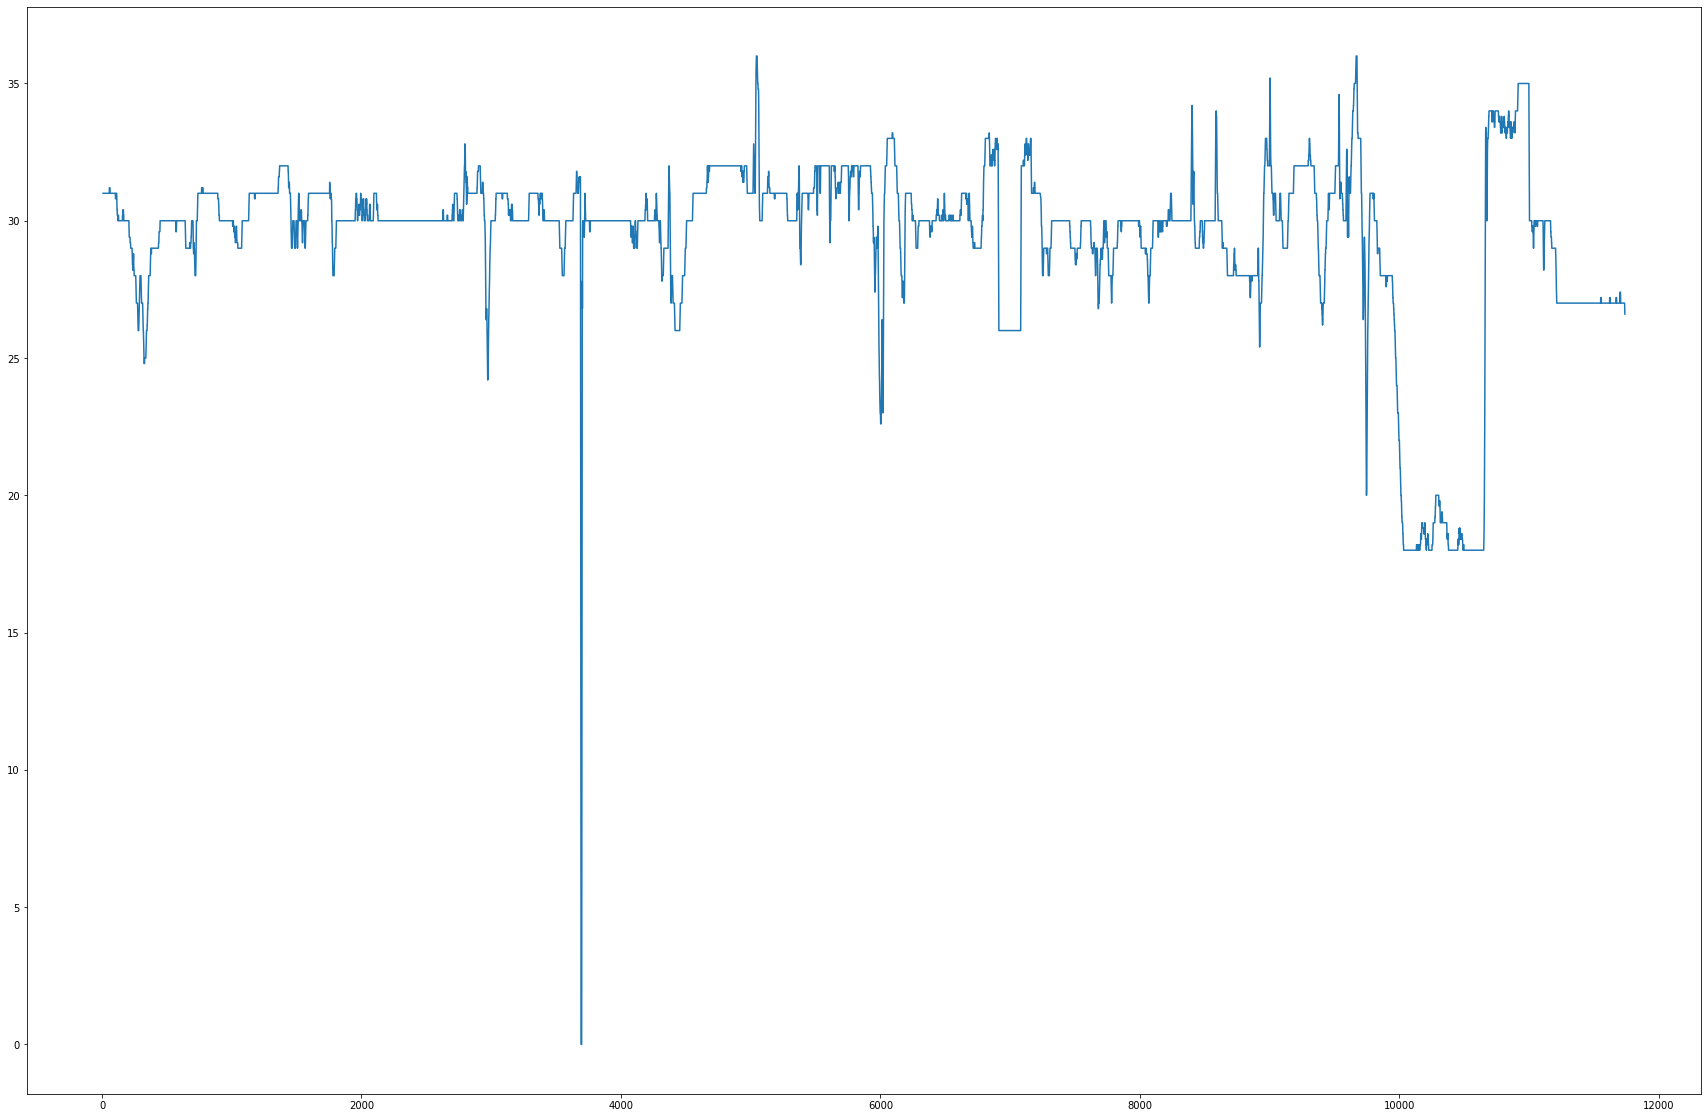

In [ ]:
g,ax=plt.subplots(1,1, figsize=(30,20))
dataframe['rolling_avg'] = dataframe['C02M (A)'].rolling(window = 5).mean()
dataframe['rolling_avg'].plot(y='TIME', kind = "line", ax = ax)

In [ ]:
std_df= dataframe.groupby('TIME').std()
std_df.head()

,EAU ACIDILE D10,VIBRATION PAL1 C02 (MM/S),VIBRATION PAL1 C02 (MM/S).1,TEMP PALIER1 C02 (DEGC),TEMP PALIER2 C02 (DEGC),C02M (A),rolling_avg
TIME,,,,,,,
0:00:10,24.201535,0.0,0.462910,0.0,6.034129,1.685018,1.476482
0:01:10,24.215919,0.0,0.462910,0.0,6.034129,1.685018,1.558158
0:02:10,23.970220,0.0,0.000000,0.0,6.034129,1.685018,1.594410
0:03:10,24.106905,0.0,0.462910,0.0,6.034129,1.125992,1.519163
0:04:10,23.886263,0.0,0.353553,0.0,6.034129,1.164965,1.442221


In [ ]:
sns.scatterplot(x = dataframe['VIBRATION PAL1 C02.1 (MM/S).1'], y = dataframe['TIME'])

KeyError: ignored

In [ ]:
std_df.sum(axis = 0) == 0

EAU ACIDILE D10                False
VIBRATION PAL1 C02 (MM/S)      False
VIBRATION PAL1 C02 (MM/S).1    False
TEMP PALIER1 C02 (DEGC)         True
TEMP PALIER2 C02 (DEGC)        False
C02M (A)                       False
rolling_avg                    False
dtype: bool